# Demonstration of Shallow Outlier Detection Models

1. [Introduction](#1-introduction)
2. [Demonstration on Synthetic Dataset](#2-demonstration-on-synthetic-dataset)
    1. [Data generation](#21-data-generation)
    2. [Model Setting](#22-model-setting)
    3. [Performances Comparation](#23-performances-comparation)
2. [Demonstration on Classical Dataset](#3-demonstration-on-classical-dataset)
    1. [Load Data](#31-load-data)
    1. [Model Setting](#32-model-setting)
    2. [Performance Comparation](#33-performance-comparation)
4. [Reference](#reference)

## 1. Introduction

This demostration shows the performace of shallow outlier detection models in several synthetic and classical dataset. The models covered in this demostration includes:

  1. Distance-based methods:
     1. **kNN: k Nearest Neighbors** (use the distance to the kth nearest 
     neighbor as the outlier score)
     2. **Average KNN** Outlier Detection (use the median distance to k nearest 
     neighbors as the outlier score)
  2. Density-based methods:
     1. **LOF: Local Outlier Factor**
  3. Histogram-based method:
     1. **HBOS: Histogram-based Outlier Score**
  3. Principal Componet Anaysis:
     1. **PCA: Principal Component Analysis** (use the sum of
       weighted projected distances to the eigenvector hyperplane 
       as the outlier outlier scores)
  4. Isolaiton-based methods
     1. **Isolation Forest**
     2. **Isolation NNE**
     3. **Isolation Distributional Kernel**

## 2. Demonstration on Synthetic Dataset

### 2.1. Data generation

In [22]:
import numpy as np
from numpy import percentile
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_moons, make_blobs

In [23]:
# Example settings
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers
ground_truth = np.zeros(n_samples, dtype=int)
ground_truth[-n_outliers:] = 1

blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]],
               cluster_std=[0.5, 0.5], **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]],
               cluster_std=[1.5, 0.3], **blobs_params)[0],
    4 * (make_moons(n_samples=n_samples, noise=0.05, random_state=0)[0]
        - np.array([0.5, 0.25])),
]

In [24]:
# Show the statics of the data
print('Number of inliers: %i' % n_inliers)
print('Number of outliers: %i' % n_outliers)
print('Ground truth shape is {shape}. Outlier are 1 and inliers are 0.\n'.format(shape=ground_truth.shape))
print(ground_truth)

Number of inliers: 255
Number of outliers: 45
Ground truth shape is (300,). Outlier are 1 and inliers are 0.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


### 2.2. Model Setting

In [1]:
# Import all models
# !pip install pyod
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
from pyod.models.pca import PCA
from pyod.models.inne import INNE

In [19]:
# models setting
random_state = np.random.RandomState(42)
classifiers = {
    'KNN': KNN(
        contamination=outliers_fraction),
    'Average KNN': KNN(method='mean',
                       contamination=outliers_fraction),
    'LOF':
        LOF(n_neighbors=35, contamination=outliers_fraction),
    'HBOS': HBOS(
        contamination=outliers_fraction),
    'PCA': PCA(
        contamination=outliers_fraction, random_state=random_state),
    'iForest': IForest(contamination=outliers_fraction,
                                random_state=random_state),
    'iNNE': INNE(contamination=outliers_fraction, max_samples=16, random_state=random_state),
}

### 2.3. Performances Comparation

  0%|          | 0/4 [00:00<?, ?it/s]

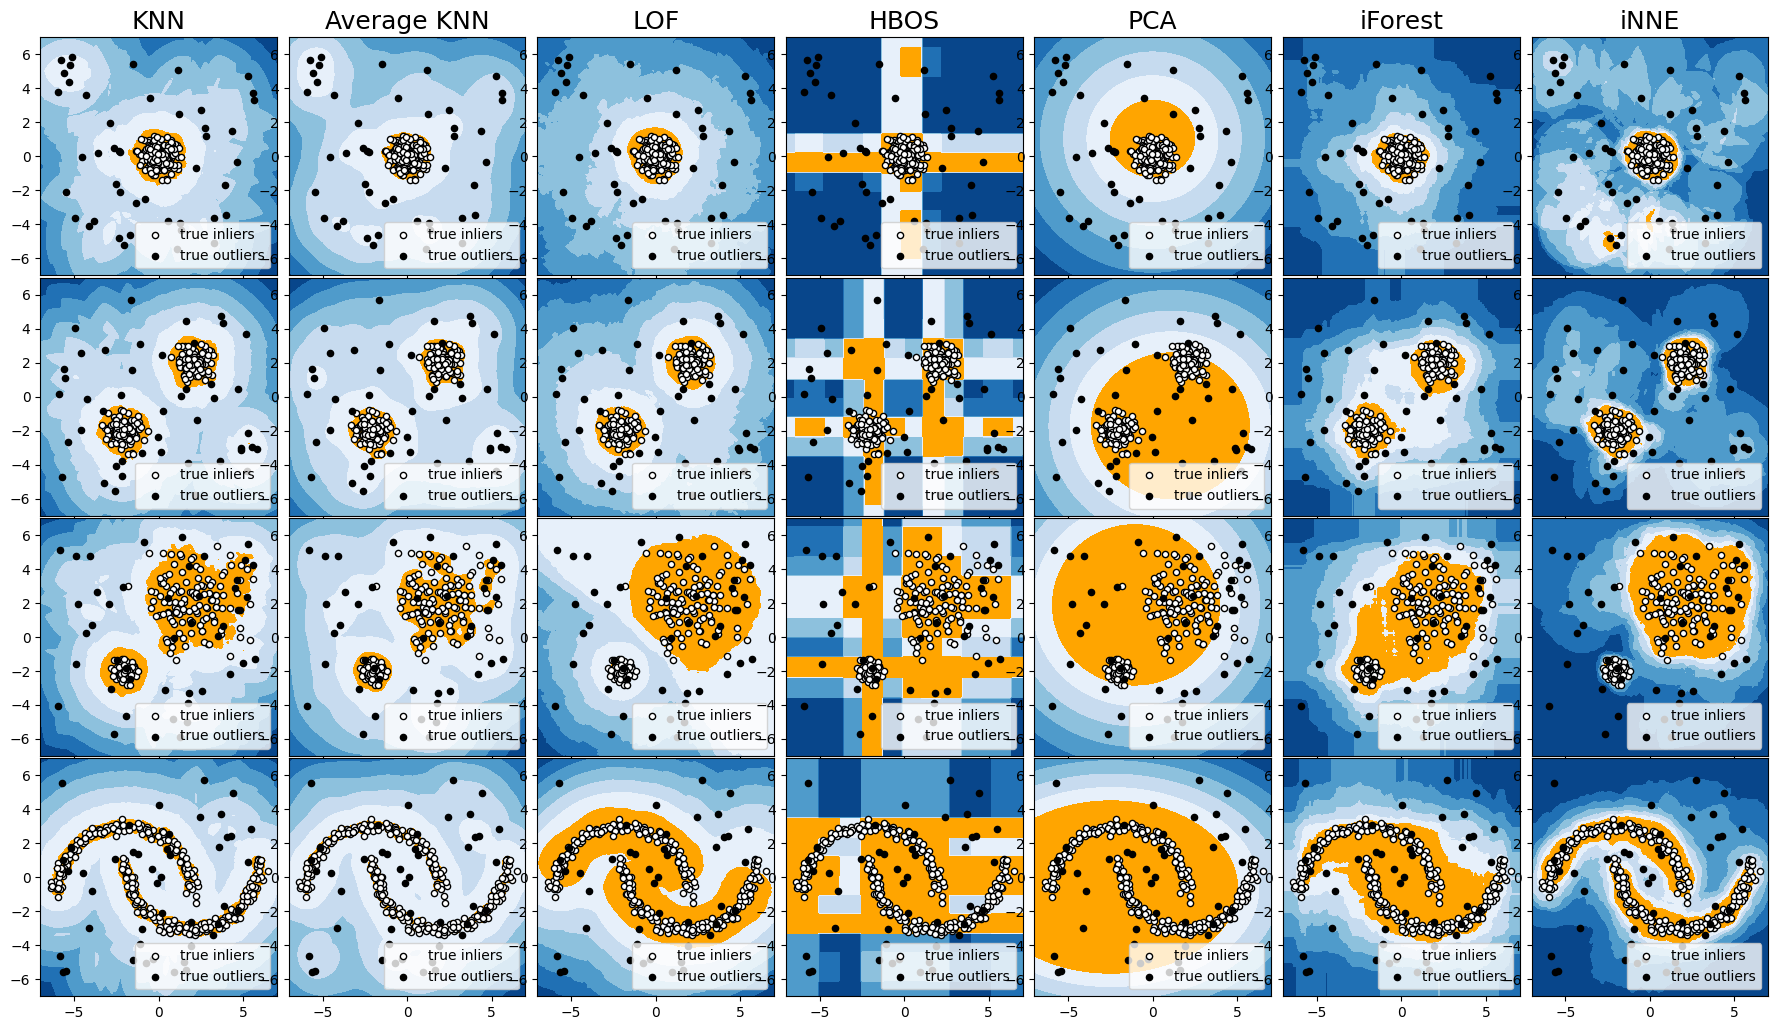

In [15]:
xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))
plt.figure(figsize=(len(classifiers) * 2 + 4, 10))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(tqdm(datasets)):
    # Add outliers
    X = np.concatenate(
        [X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

    for i_alg, (alg_name, algorithm) in enumerate(classifiers.items()):
        algorithm.fit(X)
        scores_pred = algorithm.decision_function(X) * -1
        
        y_pred = algorithm.predict(X)
        threshold = percentile(scores_pred, 100 * outliers_fraction)
        
        # plot the levels lines and the points
        Z = algorithm.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
        Z = Z.reshape(xx.shape)
        
        subplot = plt.subplot(len(datasets), len(classifiers), plot_num)
        if i_dataset == 0:
            plt.title(alg_name, size=18)
        subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                         cmap=plt.cm.Blues_r)
        subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                         colors='orange')
        b = subplot.scatter(X[:-n_outliers, 0], X[:-n_outliers, 1], c='white',
                            s=20, edgecolor='k')
        c = subplot.scatter(X[-n_outliers:, 0], X[-n_outliers:, 1], c='black',
                            s=20, edgecolor='k')
        subplot.axis('tight')
        subplot.legend(
            [b, c],
            ['true inliers', 'true outliers'],
            prop=matplotlib.font_manager.FontProperties(size=10),
            loc='lower right')
        subplot.set_xlim((-7, 7))
        subplot.set_ylim((-7, 7))
        
        plot_num += 1
        
plt.show()

## 3. Demonstration on Classical Dataset

In [26]:
from pyod.utils.utility import standardizer
from pyod.utils.utility import precision_n_scores
from sklearn.metrics import roc_auc_score
from scipy.io import loadmat
from time import time
import os

## 3.1.  Load Data

In [27]:
mat_file_list = ['arrhythmia.mat',
                 'cardio.mat',
                 'glass.mat',
                 'ionosphere.mat',
                 'letter.mat',
                 'lympho.mat',
                 'mnist.mat',
                 'musk.mat',
                 'optdigits.mat',
                 'pendigits.mat',
                 'pima.mat',
                 'satellite.mat',
                 'satimage-2.mat',
                 'shuttle.mat',
                 'vertebral.mat',
                 'vowels.mat',
                 'wbc.mat']

## 3.2. Model Setting

In [49]:
classifiers = {
	'KNN': KNN(
		contamination=outliers_fraction),
	'Average KNN': KNN(method='mean',
					contamination=outliers_fraction),
	'LOF':
		LOF(n_neighbors=35, contamination=outliers_fraction),
	'HBOS': HBOS(
		contamination=outliers_fraction),
	'PCA': PCA(
		contamination=outliers_fraction, random_state=random_state),
	'iForest': IForest(contamination=outliers_fraction,
								random_state=random_state),
	'iNNE': INNE(contamination=outliers_fraction, max_samples=8, random_state=random_state),
	}

classifiers_indices = {
	'KNN': 0,
	'Average KNN': 1,
	'LOF': 2,
	'HBOS': 3,
	'PCA': 4,
	'iForest': 5,
	'iNNE': 6,
}

## 3.3. Performance Comparation

In [50]:
# initialize the container for saving the results
df_columns = ['Data', '# Samples', '# Dimensions', 'Outlier Perc', 'KNN', 'Average KNN',
              'LOF', 'HBOS', 'PCA', 'IForest', 'INNE']
roc_df = pd.DataFrame(columns=df_columns)
n_ite = 1
n_classifiers = 7

for j in tqdm(range(len(mat_file_list))):
    mat_file = mat_file_list[j]
    print("\n... Processing", mat_file, '...')
    
    data = loadmat(os.path.join('../data/shallow', mat_file))
    X = data['X']
    y = data['y'].ravel()
    outliers_fraction = np.count_nonzero(y) / len(y)
    outliers_percentage = round(outliers_fraction * 100, ndigits=4)

    # construct containers for saving results
    roc_list = [mat_file[:-4], X.shape[0], X.shape[1], outliers_percentage]
    roc_mat = np.zeros(n_classifiers)

    random_state = np.random.RandomState()

    X_norm = standardizer(X)

    for clf_name, clf in classifiers.items():
        clf.fit(X_norm)
        test_scores = clf.decision_function(X_norm)

        roc = round(roc_auc_score(y, test_scores), ndigits=4)
        prn = round(precision_n_scores(y, test_scores), ndigits=4)

        roc_mat[classifiers_indices[clf_name]] = roc

    roc_list = roc_list + list(roc_mat)
    temp_df = pd.DataFrame(roc_list).transpose()
    temp_df.columns = df_columns
    roc_df = pd.concat([roc_df, temp_df], axis=0)

  0%|          | 0/17 [00:00<?, ?it/s]


... Processing arrhythmia.mat ...

... Processing cardio.mat ...

... Processing glass.mat ...

... Processing ionosphere.mat ...

... Processing letter.mat ...

... Processing lympho.mat ...

... Processing mnist.mat ...

... Processing musk.mat ...

... Processing optdigits.mat ...

... Processing pendigits.mat ...

... Processing pima.mat ...

... Processing satellite.mat ...

... Processing satimage-2.mat ...

... Processing shuttle.mat ...

... Processing vertebral.mat ...

... Processing vowels.mat ...

... Processing wbc.mat ...


In [51]:
roc_df

,Data,# Samples,# Dimensions,Outlier Perc,KNN,Average KNN,LOF,HBOS,PCA,IForest,INNE
0,arrhythmia,452,274,14.6018,0.7684,0.7714,0.7685,0.8141,0.7748,0.8145,0.7501
0,cardio,1831,21,9.6122,0.6861,0.6141,0.5919,0.8529,0.95,0.9312,0.9095
0,glass,214,9,4.2056,0.8325,0.8092,0.8612,0.7057,0.6027,0.7263,0.7301
0,ionosphere,351,33,35.8974,0.9337,0.9311,0.9052,0.5661,0.7947,0.8495,0.9027
0,letter,1600,32,6.25,0.9012,0.9234,0.8665,0.5683,0.5229,0.6001,0.7168
0,lympho,148,18,4.0541,0.9484,0.9554,0.973,0.9953,0.9847,0.9965,0.9671
0,mnist,7603,100,9.2069,0.8368,0.8217,0.7272,0.576,0.8498,0.7813,0.8656
0,musk,3062,166,3.1679,0.6157,0.2636,0.5848,1.0,1.0,0.9995,1.0
0,optdigits,5216,64,2.8758,0.3948,0.3374,0.4855,0.8723,0.5137,0.6508,0.5722
0,pendigits,6870,16,2.2707,0.743,0.7212,0.4781,0.926,0.9355,0.9514,0.8933


## Reference

1. Ting et al. [**Isolation Distributional Kernel A New Tool for Point & Group Anomaly Detection**](https://ieeexplore.ieee.org/abstract/document/9573389) *IEEE Transactions on Knowledge and Data Engineering*, 2021.
2. Bandaragoda et al. [**Isolation‐based anomaly detection using nearest‐neighbor ensembles.**](https://proceedings.neurips.cc/paper_files/paper/2022/file/cf93972b116ca5268827d575f2cc226b-Paper-Datasets_and_Benchmarks.pdf) *Computational Intelligence*, 2018.
3. Han et al. [**Adbench: Anomaly detection benchmark**](https://proceedings.neurips.cc/paper_files/paper/2022/file/cf93972b116ca5268827d575f2cc226b-Paper-Datasets_and_Benchmarks.pdf) *Advances in Neural Information Processing Systems*, 2022.
4. [**PyOD** (github.com/yzhao062/pyod)](https://github.com/yzhao062/pyod)
5. [**IsolationKernel** (github.com/IsolationKernel/Codes)](https://github.com/IsolationKernel/Codes)